In [137]:
!pip install python-dotenv pandas matplotlib scipy numpy


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
# Credentials file
# %load_ext dotenv
# %dotenv

import os

from tradier_python import TradierAPI
from config import TRADIER_TOKEN, TRADIER_ACCOUNT_ID

t = TradierAPI(token=TRADIER_TOKEN, default_account_id=TRADIER_ACCOUNT_ID)

# profile = t.get_profile()
# profile

In [139]:
import pandas as pd

ticker = 'TSLA'

exps = t.get_option_expirations(ticker)

chain_quotes = []

# chain = t.get_option_chains(ticker, exps[0], greeks=True)

for exp in exps:
    chain_quotes.extend([q for q in t.get_option_chains(ticker, exp, greeks=True)])

print(f"Option Contracts count: {len(chain_quotes)}")
chain_quotes[0]

Option Contracts count: 3926


Quote(symbol='TSLA230224P00015000', description='TSLA Feb 24 2023 $15.00 Put', exch='Z', type='option', last=0.01, change=0.0, volume=0, open=None, high=None, low=None, close=None, bid=0.0, ask=0.01, change_percentage=0.0, average_volume=0, last_volume=6, trade_date=1676989918236, prevclose=0.01, week_52_high=0.0, week_52_low=0.0, bidsize=0, bidexch='N', bid_date=datetime.datetime(2023, 2, 21, 20, 59, 59, tzinfo=datetime.timezone.utc), asksize=0, askexch='N', ask_date=datetime.datetime(2023, 2, 22, 8, 0, tzinfo=datetime.timezone.utc), root_symbols=None, underlying='TSLA', strike=15.0, open_interest=10, contract_size=100, expiration_date=datetime.date(2023, 2, 24), expiration_type='weeklys', option_type=put, root_symbol='TSLA', greeks=Greeks(delta=-3e-16, gamma=6.683413273969658e-16, theta=-0.0028487934772937467, vega=1.999999986622343e-05, rho=0.001233285941164828, phi=-0.016281269950013666, bid_iv=0.0, mid_iv=0.0, ask_iv=0.0, smv_vol=1.508, updated_at='2023-02-21 20:59:34'))

In [140]:
# Flatten Quote and Greeks dictionaries into list of dictionary objects
q = [{**dict(c), **dict(dict(c)['greeks'])} for c in chain_quotes]

# Convert to dataframe
df = pd.DataFrame(q)

df.describe()

,last,change,volume,bid,ask,change_percentage,average_volume,last_volume,trade_date,prevclose,...,delta,gamma,theta,vega,rho,phi,bid_iv,mid_iv,ask_iv,smv_vol
count,3806.000000,3806.0,3926.0,3926.000000,3926.000000,3806.0,3926.0,3926.000000,3.926000e+03,3806.000000,...,3.926000e+03,3.926000e+03,3.926000e+03,3926.000000,3.926000e+03,3.926000e+03,3926.000000,3926.000000,3926.000000,3926.000000
mean,66.555378,0.0,0.0,71.884804,72.674712,0.0,0.0,9.112073,1.625208e+12,66.555378,...,4.622147e-02,2.716011e-03,-8.758988e-02,0.287021,2.942428e-01,-6.695850e-01,0.575541,0.943399,0.954945,0.814923
std,96.334854,0.0,0.0,104.426696,105.155960,0.0,0.0,113.141898,2.886220e+11,96.334854,...,6.230690e-01,3.158055e-03,1.134002e-01,0.304119,3.671310e-01,9.451485e-01,0.346406,0.684780,0.683731,0.229992
min,0.010000,0.0,0.0,0.000000,0.010000,0.0,0.0,0.000000,0.000000e+00,0.010000,...,-1.000000e+00,-1.766770e-15,-1.007734e+00,0.000020,4.137957e-14,-4.608392e+00,0.000000,0.000000,0.000000,0.550000
25%,4.150000,0.0,0.0,4.300000,4.412500,0.0,0.0,1.000000,1.676649e+12,4.150000,...,-4.252962e-01,4.361552e-04,-9.752247e-02,0.022585,2.547407e-02,-9.590092e-01,0.558328,0.635159,0.642618,0.637000
50%,29.980000,0.0,0.0,31.575000,32.175000,0.0,0.0,1.000000,1.677006e+12,29.980000,...,1.033700e-12,2.045350e-03,-5.534174e-02,0.178151,1.093644e-01,-2.052900e-01,0.643021,0.748879,0.757913,0.746000
75%,91.125000,0.0,0.0,97.587500,98.387500,0.0,0.0,3.000000,1.677013e+12,91.125000,...,5.742001e-01,3.514237e-03,-2.355937e-02,0.481086,4.860602e-01,-4.388993e-02,0.763898,0.955387,0.986610,0.926000
max,685.140000,0.0,0.0,627.050000,629.200000,0.0,0.0,6080.000000,1.677013e+12,685.140000,...,1.000000e+00,2.686897e-02,-5.176840e-11,1.226963,1.582182e+00,-4.192441e-14,2.253825,9.324526,9.324526,1.519000


In [141]:
print(df.shape)
print(df.columns)

(3926, 47)
Index(['symbol', 'description', 'exch', 'type', 'last', 'change', 'volume',
       'open', 'high', 'low', 'close', 'bid', 'ask', 'change_percentage',
       'average_volume', 'last_volume', 'trade_date', 'prevclose',
       'week_52_high', 'week_52_low', 'bidsize', 'bidexch', 'bid_date',
       'asksize', 'askexch', 'ask_date', 'root_symbols', 'underlying',
       'strike', 'open_interest', 'contract_size', 'expiration_date',
       'expiration_type', 'option_type', 'root_symbol', 'greeks', 'delta',
       'gamma', 'theta', 'vega', 'rho', 'phi', 'bid_iv', 'mid_iv', 'ask_iv',
       'smv_vol', 'updated_at'],
      dtype='object')


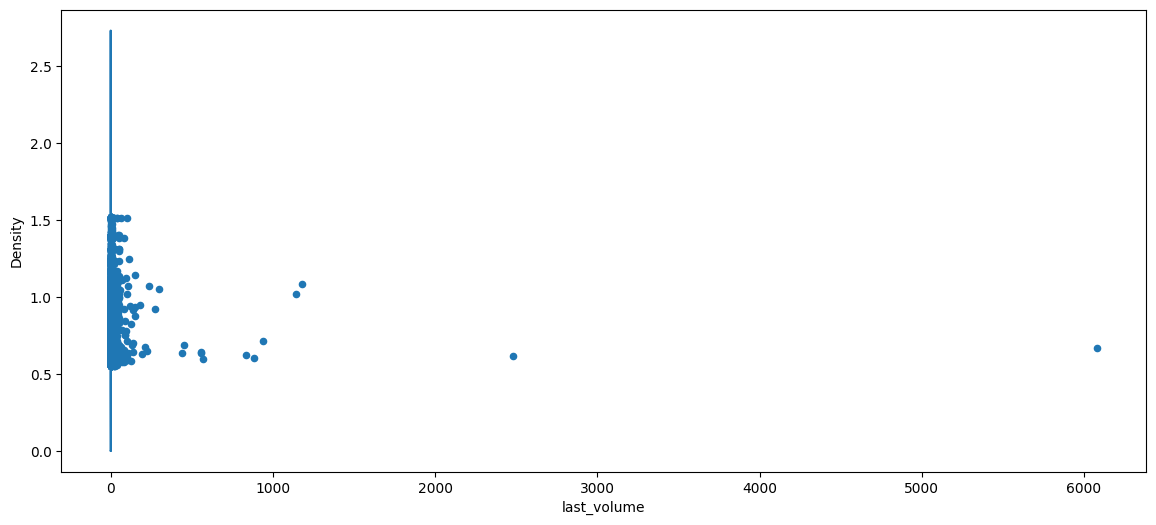

In [142]:
import matplotlib.pyplot as plt

df["smv_vol"].plot(kind='density', figsize=(14, 6))
plt.show()

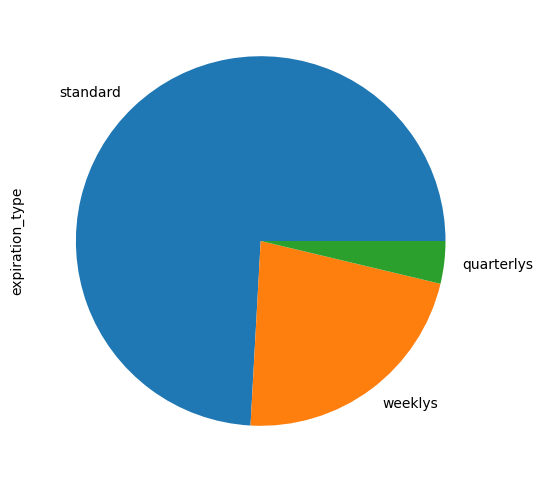

In [143]:
df["expiration_type"].value_counts().plot(kind='pie', figsize=(14, 6))
plt.show()

In [144]:
# Get correlation data
corr = df.corr(numeric_only=True)
corr

,last,change,volume,bid,ask,change_percentage,average_volume,last_volume,trade_date,prevclose,...,delta,gamma,theta,vega,rho,phi,bid_iv,mid_iv,ask_iv,smv_vol
last,1.000000,NaN,NaN,0.980590,0.980728,NaN,NaN,0.090300,-0.596125,1.000000,...,-0.260202,-0.224437,0.238047,0.051578,0.010587,-0.023177,-0.547672,0.145357,0.145706,-0.077164
change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bid,0.980590,NaN,NaN,1.000000,0.999980,NaN,NaN,0.087420,-0.276971,0.980590,...,-0.298458,-0.245485,0.253570,-0.009465,-0.040818,0.018727,-0.570914,0.207823,0.207305,-0.018509
ask,0.980728,NaN,NaN,0.999980,1.000000,NaN,NaN,0.087483,-0.275655,0.980728,...,-0.298040,-0.245310,0.253773,-0.006821,-0.038391,0.016429,-0.570785,0.206050,0.205497,-0.020866
change_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_volume,0.090300,NaN,NaN,0.087420,0.087483,NaN,NaN,1.000000,0.013102,0.090300,...,-0.050490,-0.020192,0.020643,0.005067,-0.013741,0.016612,-0.048372,-0.002806,-0.003345,-0.013861
trade_date,-0.596125,NaN,NaN,-0.276971,-0.275655,NaN,NaN,0.013102,1.000000,-0.596125,...,0.084985,0.117697,-0.102089,0.147136,0.130835,-0.110915,0.248297,-0.231832,-0.230848,-0.177504
prevclose,1.000000,NaN,NaN,0.980590,0.980728,NaN,NaN,0.090300,-0.596125,1.000000,...,-0.260202,-0.224437,0.238047,0.051578,0.010587,-0.023177,-0.547672,0.145357,0.145706,-0.077164


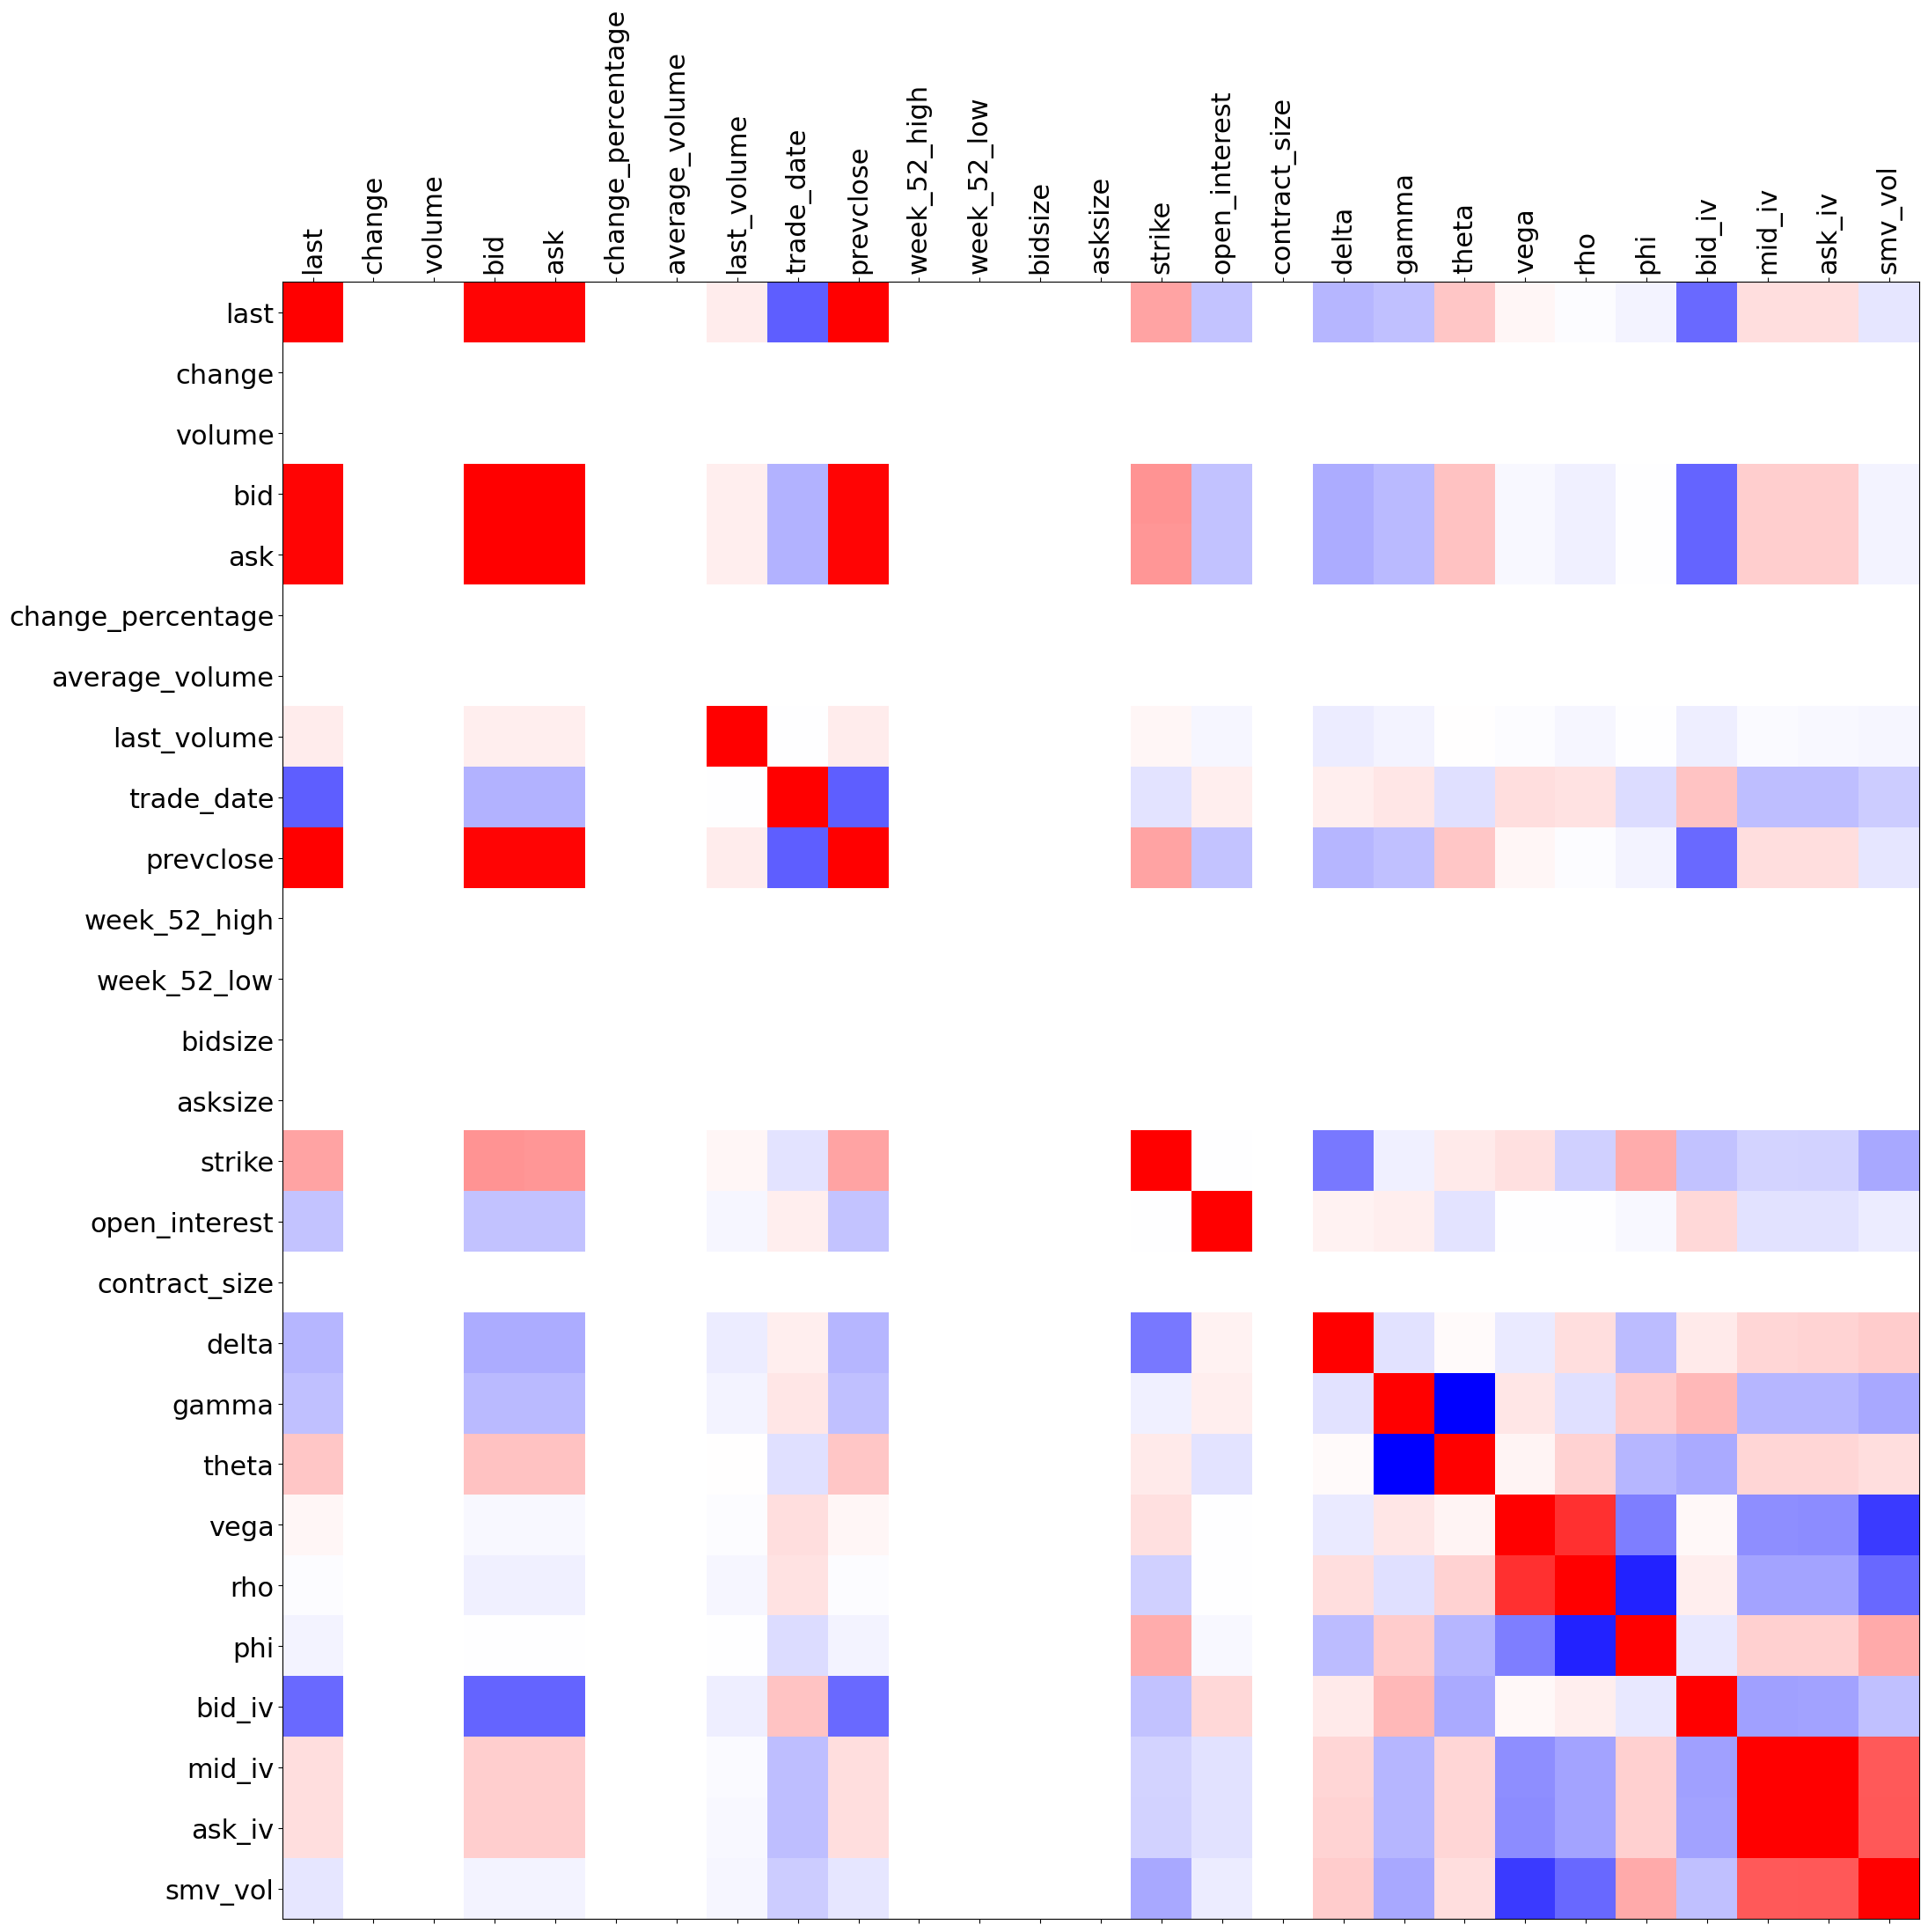

In [145]:
fig = plt.figure(figsize=(24, 24))

plt.matshow(corr, cmap="bwr", fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=22, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=22)
plt.show()

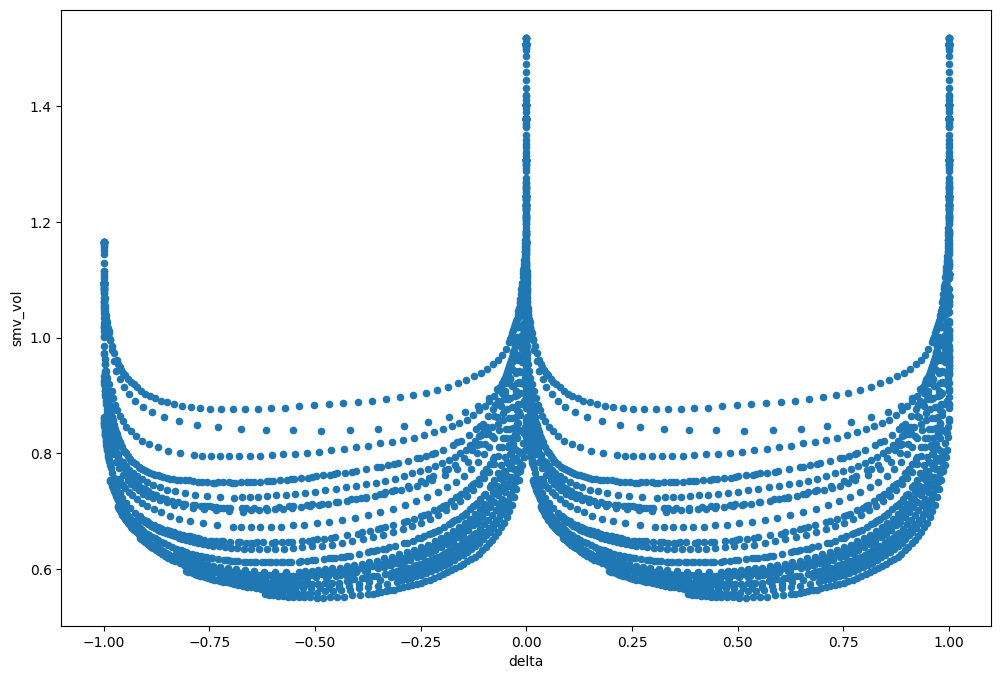

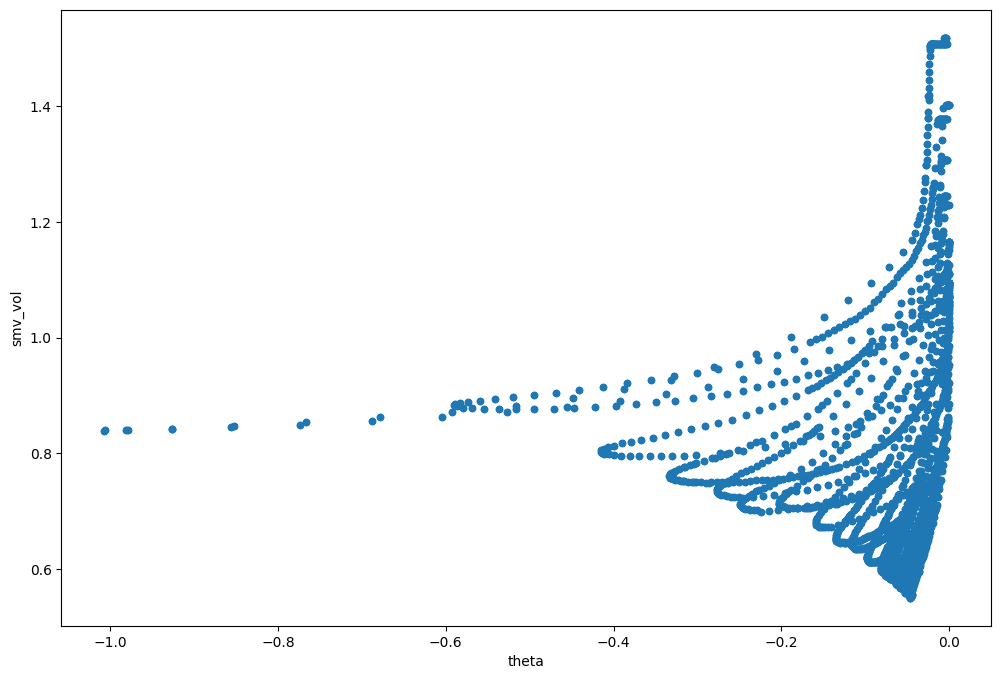

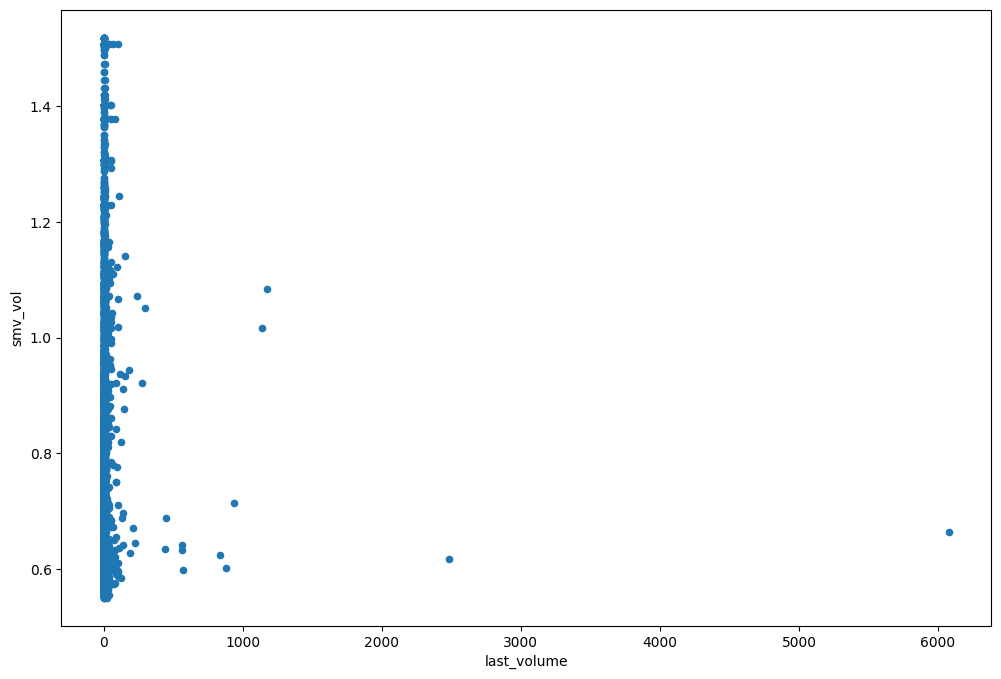

In [160]:
df.plot(kind='scatter', x='delta', y='smv_vol', figsize=(12, 8))
plt.show()

df.plot(kind='scatter', x='theta', y='smv_vol', figsize=(12, 8))
plt.show()

df.plot(kind='scatter', x='last_volume', y='smv_vol', figsize=(12, 8))

# filter df by last_volume > 100
# for data in df[df['last_volume'] > 100]:
#     plt.annotate(text="test", xy=(1, 1), xytext=(3, 4))

# plt.annotate('annotate', xy=(2, 1), xytext=(3, 4),
#             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()